# Import Library
Import pandas untuk melakukan pengolahan dataframe, load dataset, dan proses manipulasi data lainnya, dan gunakan pyarrow untuk dapat bekerja sebagai engine di Jupyter Notebook (jika running di Google Colab tidak perlu ini)

In [1]:
# Import Library

import pandas as pd

In [2]:
# Install engine agar bisa membaca data parquet

!pip install pyarrow

# Load Dataset
Load kedua dataset menggunakan Pandas dengan bantuan engine pyarrow dan kita bisa amati jumlah baris dan kolom dari kedua dataset tersebut

In [3]:
# Load dataset movie.parquet

df_movie = pd.read_parquet('./movie.parquet', engine='pyarrow')
df_movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27270,131254,Kein Bund für's Leben (2007),Comedy
27271,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27272,131258,The Pirates (2014),Adventure
27273,131260,Rentun Ruusu (2001),(no genres listed)


In [4]:
# Load dataset rating.parquet

df_rating = pd.read_parquet('./rating.parquet', engine='pyarrow')
df_rating

,#,userId,movieId,rating,timestamp
0,1,1,2,3.5,2005-04-02 23:53:47
1,2,1,29,3.5,2005-04-02 23:31:16
2,3,1,32,3.5,2005-04-02 23:33:39
3,4,1,47,3.5,2005-04-02 23:32:07
4,5,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...,...
20000258,20000259,138493,68954,4.5,2009-11-13 15:42:00
20000259,20000260,138493,69526,4.5,2009-12-03 18:31:48
20000260,20000261,138493,69644,3.0,2009-12-07 18:10:57
20000261,20000262,138493,70286,5.0,2009-11-13 15:42:24


# EDA Dataset
Lakukan eksplorasi data secara analitis dengan melihat unique value-nya, informasi jumlah data dari masing-masing kolom dan tipe datanya, melihat nilai statistika dari masing-masing kolom dari kedua dataset

In [5]:
# lihat unique value movie

df_movie.nunique()

movieId    27275
title      27259
genres      1342
dtype: int64

In [6]:
# lihat unique value rating

df_rating.nunique()

#            20000263
userId         138493
movieId         26744
rating             10
timestamp    15351121
dtype: int64

In [7]:
# lihat informasi mendalam dari movie

df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27275 entries, 0 to 27274
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27275 non-null  int64 
 1   title    27275 non-null  object
 2   genres   27275 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.4+ KB


In [8]:
# lihat informasi mendalam dari rating

df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 5 columns):
 #   Column     Dtype         
---  ------     -----         
 0   #          int64         
 1   userId     int64         
 2   movieId    int64         
 3   rating     float64       
 4   timestamp  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 762.9 MB


In [9]:
# lihat informasi nilai statistika dari movie

df_movie.describe()

,movieId
count,27275.000000
mean,59855.759083
std,44429.452895
min,1.000000
25%,6930.500000
50%,68069.000000
75%,100292.500000
max,131262.000000


In [10]:
# lihat informasi nilai statistika dari rating

df_rating.describe()

,#,userId,movieId,rating,timestamp
count,2.000026e+07,2.000026e+07,2.000026e+07,2.000026e+07,20000263
mean,1.000013e+07,6.904587e+04,9.041567e+03,3.525529e+00,2004-11-20 02:32:01.677113984
min,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e-01,1995-01-09 11:46:44
25%,5.000066e+06,3.439500e+04,9.020000e+02,3.000000e+00,2000-08-20 18:55:45
50%,1.000013e+07,6.914100e+04,2.167000e+03,3.500000e+00,2004-12-20 15:18:06
75%,1.500020e+07,1.036370e+05,4.770000e+03,4.000000e+00,2008-11-02 16:11:57.500000
max,2.000026e+07,1.384930e+05,1.312620e+05,5.000000e+00,2015-03-31 06:40:02
std,5.773579e+06,4.003863e+04,1.978948e+04,1.051989e+00,NaN


In [11]:
# Hitung unique value kemudian tampilkan jumlahnya
# Bisa kita lihat semua nilai adalah unik

count=(df_movie.movieId.value_counts()).to_frame()
count.reset_index(inplace=True)
count.columns=['movieId','count']
count

,movieId,count
0,1,1
1,91044,1
2,91035,1
3,91031,1
4,91028,1
...,...,...
27270,26853,1
27271,26851,1
27272,26850,1
27273,26849,1


In [12]:
# Hitung nilai unik ternyata terjadi duplikasi nilai
# dari masing-masing judul film, padahal ID-nya unik

count=(df_movie.title.value_counts()).to_frame()
count.reset_index(inplace=True)
count.columns=['title','count']
count

,title,count
0,Blackout (2007),2
1,"Girl, The (2012)",2
2,Casanova (2005),2
3,Emma (1996),2
4,Paradise (2013),2
...,...,...
27254,Tai Chi Master (Twin Warriors) (Tai ji: Zhang ...,1
27255,Splitting Heirs (1993),1
27256,Sonatine (Sonachine) (1993),1
27257,"Snapper, The (1993)",1


In [13]:
# Cek tipe data

df_movie.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [14]:
# Cek tipe data

df_rating.dtypes

#                     int64
userId                int64
movieId               int64
rating              float64
timestamp    datetime64[ns]
dtype: object

# Check Specific Data on Duplicates Data
selanjutnya kita selidiki lagi mengapa bisa terjadi duplikasi data di data movie saya kira data ini adalah data master sehingga seharusnya tidak ada duplikasi data pada bagian judul film dengan nama yang sama, secara logika film tidak mungkin diterbitkan dengan nama yang sama dan ditahun yang sama. Namun jangan di drop duplicates karena kita tidak tau ID mana yang tercatat pada data rating (untuk proses joining table)

In [15]:
# Hitung nilai dari judul film yang duplikat
# Jumlahnya 16 data, 27275 - 16 = 27259
# Jumlah keseluruhan sama dengan data title movie

count[count['count']==2]

,title,count
0,Blackout (2007),2
1,"Girl, The (2012)",2
2,Casanova (2005),2
3,Emma (1996),2
4,Paradise (2013),2
5,Hamlet (2000),2
6,"20,000 Leagues Under the Sea (1997)",2
7,Chaos (2005),2
8,Darling (2007),2
9,Beneath (2013),2


In [16]:
# Setelah dicek ternyata ID dan pencatatan genre menjadi masalah

df_movie[df_movie['title']=='Casanova (2005)']

,movieId,title,genres
10693,42015,Casanova (2005),Action|Adventure|Comedy|Drama|Romance
26805,128862,Casanova (2005),Comedy|Drama|Romance


In [17]:
# Genre sama namun pencatatan ID bermasalah

df_movie[df_movie['title']=='Girl, The (2012)']

,movieId,title,genres
19761,97773,"Girl, The (2012)",Drama
20651,101212,"Girl, The (2012)",Drama


In [18]:
# Setelah dicek ternyata ID dan pencatatan genre menjadi masalah

df_movie[df_movie['title']=='Blackout (2007)']

,movieId,title,genres
13415,66140,Blackout (2007),Horror|Thriller
16825,85070,Blackout (2007),Drama


# Create Date and Time Columns on Rating Dataset
Split timestamp menjadi dua kolom baru yaitu date dan time untuk memudahkan proses visualisasi data nantinya

In [19]:
# Split Data dan ubah menjadi date dan time

df_rating['date'] = df_rating['timestamp'].dt.date
df_rating['time'] = df_rating['timestamp'].dt.time

In [20]:
# Tampilkan perubahan

df_rating.head(10)

,#,userId,movieId,rating,timestamp,date,time
0,1,1,2,3.5,2005-04-02 23:53:47,2005-04-02,23:53:47
1,2,1,29,3.5,2005-04-02 23:31:16,2005-04-02,23:31:16
2,3,1,32,3.5,2005-04-02 23:33:39,2005-04-02,23:33:39
3,4,1,47,3.5,2005-04-02 23:32:07,2005-04-02,23:32:07
4,5,1,50,3.5,2005-04-02 23:29:40,2005-04-02,23:29:40
5,6,1,112,3.5,2004-09-10 03:09:00,2004-09-10,03:09:00
6,7,1,151,4.0,2004-09-10 03:08:54,2004-09-10,03:08:54
7,8,1,223,4.0,2005-04-02 23:46:13,2005-04-02,23:46:13
8,9,1,253,4.0,2005-04-02 23:35:40,2005-04-02,23:35:40
9,10,1,260,4.0,2005-04-02 23:33:46,2005-04-02,23:33:46


# Create Joining Table using Left Outer Join
Lakukan joining table menggunakan konsep yang sama persis pada SQL yaitu Left Outer Join, dengan table left-nya diisi oleh tabel rating dan tabel kanan adalah tabel movie

In [21]:
# Joining Table menggunakan validasi movieId

left_join = pd.merge(df_rating, df_movie, how="left", on=["movieId"])
left_join.shape

(20000263, 9)

In [22]:
# Tampilkan perubahan

left_join.head(10)

,#,userId,movieId,rating,timestamp,date,time,title,genres
0,1,1,2,3.5,2005-04-02 23:53:47,2005-04-02,23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,2,1,29,3.5,2005-04-02 23:31:16,2005-04-02,23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,3,1,32,3.5,2005-04-02 23:33:39,2005-04-02,23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,4,1,47,3.5,2005-04-02 23:32:07,2005-04-02,23:32:07,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,5,1,50,3.5,2005-04-02 23:29:40,2005-04-02,23:29:40,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
5,6,1,112,3.5,2004-09-10 03:09:00,2004-09-10,03:09:00,Rumble in the Bronx (Hont faan kui) (1995),Action|Adventure|Comedy|Crime
6,7,1,151,4.0,2004-09-10 03:08:54,2004-09-10,03:08:54,Rob Roy (1995),Action|Drama|Romance|War
7,8,1,223,4.0,2005-04-02 23:46:13,2005-04-02,23:46:13,Clerks (1994),Comedy
8,9,1,253,4.0,2005-04-02 23:35:40,2005-04-02,23:35:40,Interview with the Vampire: The Vampire Chroni...,Drama|Horror
9,10,1,260,4.0,2005-04-02 23:33:46,2005-04-02,23:33:46,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi


# Check Null Values After Joining Table and Drop It!

In [23]:
# Cek unique value

left_join.nunique()

#            20000263
userId         138493
movieId         26744
rating             10
timestamp    15351121
date             6911
time            86400
title           26726
genres           1329
dtype: int64

In [24]:
# Cek kekosongan data

left_join.isna().sum()

#              0
userId         0
movieId        0
rating         0
timestamp      0
date           0
time           0
title        281
genres       281
dtype: int64

In [25]:
# Hapus atribut yang tidak berguna

left_join = left_join.drop('#', axis=1)

In [26]:
# Drop baris yang mengandung null values
# 20000263 - 281 = 19999982

left_join.dropna()

,userId,movieId,rating,timestamp,date,time,title,genres
0,1,2,3.5,2005-04-02 23:53:47,2005-04-02,23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,2005-04-02 23:31:16,2005-04-02,23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,2005-04-02 23:33:39,2005-04-02,23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,2005-04-02 23:32:07,2005-04-02,23:32:07,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,2005-04-02 23:29:40,2005-04-02,23:29:40,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00,2009-11-13,15:42:00,Up (2009),Adventure|Animation|Children|Drama
20000259,138493,69526,4.5,2009-12-03 18:31:48,2009-12-03,18:31:48,Transformers: Revenge of the Fallen (2009),Action|Adventure|Sci-Fi|IMAX
20000260,138493,69644,3.0,2009-12-07 18:10:57,2009-12-07,18:10:57,Ice Age: Dawn of the Dinosaurs (2009),Action|Adventure|Animation|Children|Comedy|Rom...
20000261,138493,70286,5.0,2009-11-13 15:42:24,2009-11-13,15:42:24,District 9 (2009),Mystery|Sci-Fi|Thriller


# Data to Visualize

## Import Library Visualization
Gunakan plotly express dan matplotlib untuk melakukan visualisasi data

In [92]:
# Import Library

import plotly.express as px
import matplotlib.pyplot as plt

## Create Sampling Data, Bcs Data is too Much!
Lakukan sampling data menggunakan metode sampling acak dikarenakan data sangat besar

In [83]:
# Sampling data

left_join_sample = left_join.sample(n=5000, random_state=42)

## Visualize Data
Time to visualize the data using plotly and matplotlib!

In [84]:
# Tampilkan scatter untuk perbandingan movieId dengan rating

px.scatter(left_join_sample, 
           x='movieId', 
           y='rating', 
           hover_data=['title'],
           title='Ratings vs Movie ID', 
           template='plotly_white')

In [85]:
# Split data genre agar bisa dikategorisasikan

genres = left_join_sample['genres'].str.split('|', expand=True).stack().value_counts()

In [86]:
# Tampilkan menggunakan pie chart

px.pie(genres,
       names=genres.index,
       values=genres.values,
       title='Genre Distribution')

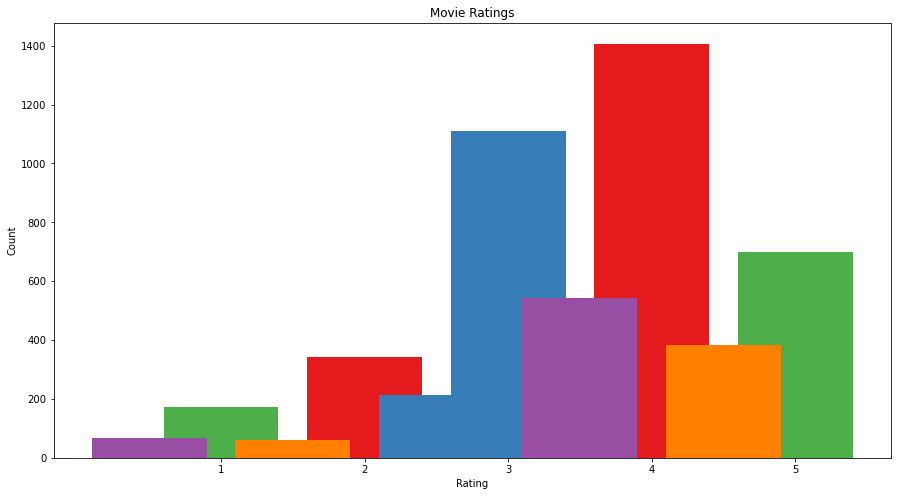

In [88]:
# Buat list warna
rating_colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00']

# Tampilkan grafik rating menggunakan matplotlib
plt.figure(figsize=(15, 8))
plt.bar(left_join_sample['rating'].value_counts().index, 
        left_join_sample['rating'].value_counts().values, 
        color=rating_colors)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Movie Ratings')
plt.xticks(range(1, 6))  # Assuming ratings are from 1 to 5
plt.show()

In [89]:
# Ambil data tahun saja pada atribut date

left_join_sample['date'] = pd.to_datetime(left_join_sample['date'])
left_join_sample['year'] = left_join_sample['date'].dt.year

In [90]:
# Kemudian hitung rata-rata rating untuk setiap tahun

yearly_ratings = left_join_sample.groupby('year')['rating'].mean()

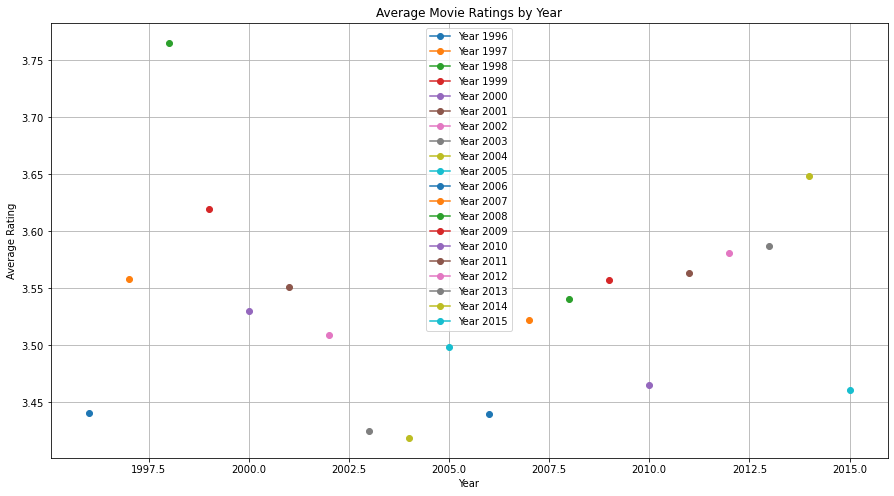

In [91]:
# Tampilkan menggunakan matplotlib

plt.figure(figsize=(15, 8))
for year, rating in yearly_ratings.items():
    plt.plot(year, rating, marker='o', label=f'Year {year}')

plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Ratings by Year')
plt.legend()
plt.grid()
plt.show()

# Additional
Plotly punya framework yang bisa dipakai untuk membuat dashboard analytics sederhana yaitu dash

In [93]:
# Install Dash

!pip install dash

In [95]:
# Import Dash 

import dash
import dash_core_components as dcc
import dash_html_components as html

In [96]:
# Buat nama app dari dash

app = dash.Dash(__name__)

In [100]:
# Atur layout dan data yang ingin ditampilkan

app.layout = html.Div(
    style={
        'backgroundColor': '#73BB73',
        'fontFamily': 'Arial, sans-serif',
        'padding': '30px'
    },
    children=[
        html.H1("Dashboard Analytics", style={'textAlign': 'center', 'color': '#333'}),

        html.Div([
            dcc.Graph(
                id='scatter-plot',
                figure=px.scatter(
                    left_join_sample, x='movieId', y='rating', hover_data=['title'],
                    title='Ratings vs Movie ID', template='plotly_white'
                )
            ),
        ], style={'margin': '20px'}),
        
        html.Div([
            dcc.Graph(
                id='pie-chart',
                figure=px.pie(left_join_sample['genres'].str.split('|', expand=True).stack().value_counts(),
                      names=left_join_sample['genres'].str.split('|', expand=True).stack().value_counts().index,
                      values=left_join_sample['genres'].str.split('|', expand=True).stack().value_counts().values,
                      title='Genre Distribution'
                      )
            ),
        ], style={'margin': '20px'}),

        html.Div([
            dcc.Graph(
                id='bar-plot',
                figure=px.bar(
                    left_join_sample['genres'].str.split('|', expand=True).stack().value_counts(),
                    x=left_join_sample['genres'].str.split('|', expand=True).stack().value_counts().index,
                    y=left_join_sample['genres'].str.split('|', expand=True).stack().value_counts().values,
                    labels={'x': 'Genres', 'y': 'Count'},
                    title='Genres Count', template='plotly_white'
                )
            ),
        ], style={'margin': '20px'}),
    ]
)

In [101]:
# Run dashboard sederhana dash

if __name__ == '__main__':
    app.run_server(debug=True)